In [ ]:
!pip install tensorflow keras numpy matplotlib scikit-learn

# Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path ke direktori di Google Drive
drive_path = '/content/drive/MyDrive/Capstone/Dataset_Tomato'


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

ds = tf.keras.utils.image_dataset_from_directory(
    f'{drive_path}',
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True
)

Found 2198 files belonging to 5 classes.


In [ ]:
class_names = ds.class_names
class_names

['Blossom-end-rottation', 'Cracking', 'Healthy', 'Spliting', 'Sun-scaled']

Batch 1 Imgs shape: (32, 256, 256, 3)
Batch 1 Lbls: [1 1 3 1 1 3 0 1 1 1 3 0 3 3 4 4 4 0 3 1 3 3 4 1 0 0 1 1 0 0 4 4]


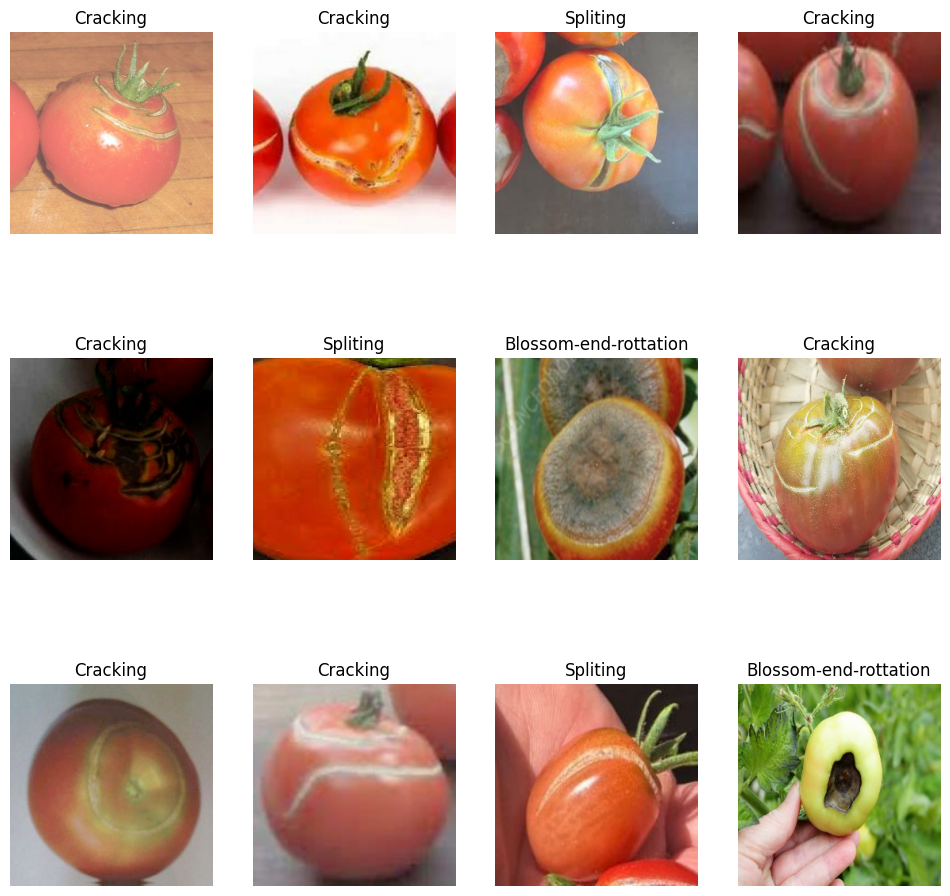

In [ ]:
#display sample data
import matplotlib.pyplot as plt

img = None

plt.figure(figsize = (12, 12))

for imgs, lbls in ds.take(1):
  print(f'Batch 1 Imgs shape: {imgs.shape}')
  print(f'Batch 1 Lbls: {lbls.numpy()}')

  img = imgs[0].numpy().astype('uint8')

  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(imgs[i]. numpy().astype('uint8'))
    plt.title(class_names[lbls[i]])
    plt.axis('off')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% data untuk validasi
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2
)

train_generator = datagen.flow_from_directory(
    drive_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    drive_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1760 images belonging to 5 classes.
Found 438 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_baseline = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history_baseline = model_baseline.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
55/55 [==============================] - 504s 9s/step - loss: -16035.7568 - accuracy: 0.2409 - val_loss: -64776.6719 - val_accuracy: 0.2308
Epoch 2/10
55/55 [==============================] - 96s 2s/step - loss: -261160.3438 - accuracy: 0.2403 - val_loss: -631399.6875 - val_accuracy: 0.2428
Epoch 3/10
55/55 [==============================] - 83s 1s/step - loss: -1336560.2500 - accuracy: 0.2403 - val_loss: -2444703.7500 - val_accuracy: 0.2284
Epoch 4/10
55/55 [==============================] - 83s 2s/step - loss: -3993337.0000 - accuracy: 0.2403 - val_loss: -5981147.5000 - val_accuracy: 0.2428
Epoch 5/10
55/55 [==============================] - 90s 2s/step - loss: -9020061.0000 - accuracy: 0.2403 - val_loss: -12968315.0000 - val_accuracy: 0.2452
Epoch 6/10
55/55 [==============================] - 83s 1s/step - loss: -17007940.0000 - accuracy: 0.2403 - val_loss: -22590072.0000 - val_accuracy: 0.2332
Epoch 7/10
55/55 [==============================] - 81s 1s/step - loss: -28849

In [ ]:
# Evaluasi pada data validasi
loss, accuracy = model_baseline.evaluate(validation_generator)
print(f'Validation accuracy of the baseline model: {accuracy*100:.2f}%')

14/14 [==============================] - 8s 566ms/step - loss: -109483552.0000 - accuracy: 0.2397
Validation accuracy of the baseline model: 23.97%


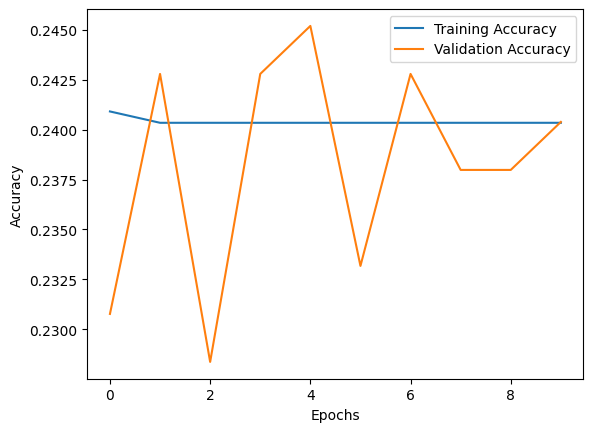

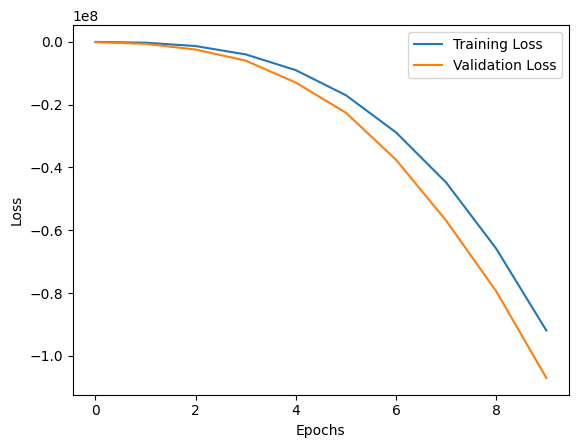

In [ ]:
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
